## 13. 


Program a Newton mehtod to compute all roots with an error less than $10^{-6}$.
$$p(x) = -18.8496 - 143.588x + 128.148x^2 + 113.355x^3 - 144.125x^4 + 24.7208x^5 + 19.634x^6 - 8.68x^7 + x^8 $$

In [299]:
import numpy as np

In [44]:
def p(x):
    return -18.8496 - 143.588*x + 128.148*x**2 + 113.355*x**3 - 144.125*x**4\
            + 24.7208*x**5 + 19.634*x**6 - 8.68*x**7 + x**8

def grad_p(x):
    return - 143.588 + 2*128.148*x + (3*113.355)*x**2 - (4*144.125)*x**3\
            + (5*24.7208)*x**4 + (6*19.634)*x**5 - (7*8.68)*x**6 + 8*x**7

def NewtonStep(x, f, gradf, step_size=1):
    try:
        d = f(x) / gradf(x)
    except Exception as e:
        print(e)
        d = np.zeros(x.shape)
    return x - step_size*d

In [328]:
thresh = 10e-10
points = np.linspace(-500,500,10000)
roots_r = []
roots = []
for i, x in enumerate(points):
    for j in range(10000):
        x = NewtonStep(x, p, grad_p, step_size=1)
        if np.abs(p(x)) < thresh and round(x,3) not in roots_r: 
            print(f'The {len(roots)+1}-th root of p(x) is {x}, p(x)={p(x)}') 
#             print(i, j, x, grad_p(x))
            roots_r.append(round(x, 3))
            roots.append(x)
    
            break
roots

The 1-th root of p(x) is -2.1999989890133125, p(x)=1.0231815394945443e-12
The 2-th root of p(x) is 3.399669245535853, p(x)=3.637978807091713e-12
The 3-th root of p(x) is -0.9999991183995526, p(x)=4.440892098500626e-15
The 4-th root of p(x) is -0.12000015052496266, p(x)=1.603307869309854e-15
The 5-th root of p(x) is 1.950934252691668, p(x)=-2.842170943040401e-14
The 6-th root of p(x) is 2.504904525849647, p(x)=-9.094947017729282e-13


[-2.1999989890133125,
 3.399669245535853,
 -0.9999991183995526,
 -0.12000015052496266,
 1.950934252691668,
 2.504904525849647]

In [325]:
[(p(r),r) for r in roots]

[(1.0231815394945443e-12, -2.1999989890133125),
 (2.1827872842550278e-11, 3.399669245536003),
 (0.0, 2.504904525849639),
 (1.4210854715202004e-13, 1.9509342526928335),
 (1.603307869309854e-15, -0.12000015052496266),
 (4.440892098500626e-15, -0.9999991183995526)]

In [126]:
import sympy as sym

In [132]:
def symbolic_fn(coef):
    """
    Generating function using coefficients
    The function takes the list of input coefficients and generate Symbolic function
    """
    sym_fun=0
    x=sym.Symbol('x')
    for i,val in enumerate(coef):
        sym_fun=sym_fun+coef[-1-i]*x**i
    return sym_fun

In [133]:
def evaluate_sym_exp(exp, value):
  """Evaluating the symbolic function"""
  return exp.subs(list(exp.free_symbols)[0], value)

In [287]:
def newtons_method(fn):
    """
    Newtons Method
    The function takes a symbolic expression as the input and gives one root of the function as output
    """
    n=0
    x=1
    while np.abs(float(evaluate_sym_exp(fn, x))) > 10e-16 and n<100000:
        fn_val = evaluate_sym_exp(fn, x)
#         print(np.abs(float(evaluate_sym_exp(fn, x))) > 10e-6)
        dif_fn_val=evaluate_sym_exp(sym.diff(fn), x)
        x = x - (fn_val/dif_fn_val)
        n = n + 1
    print(n)
    return round(x,99)

y=symbolic_fn([1,-9,26,-24])
newtons_method(y)

7


1.999999999999999999999992140885451242689175076317201983230532547704598403652584341629315848759846268

In [174]:
int(evaluate_sym_exp(y, 1))>0

False

In [137]:
def synthetic_division(coef,root):
    """
    Synthetic Division
    It takes one of the roots of n-degree polynomial and outputs a polynomial of n-1 degree
    """
    quotient=[]
    val=coef[0]
    for i,j in enumerate(coef):
        if i==0:
            quotient.append(coef[i])
        else:
            val=val*root+coef[i]
            quotient.append(val)
    quotient.pop()
    return (quotient)

In [237]:
synthetic_division([1,-9,26,-24])

[1, -6, 8]

In [288]:
def solve_any_poly(coef):
    """
    Solving Polynomial
    The function takes the list of coefficients of the polynomial of any degree
    and outputs list of all roots of the given polynomial
    """
    roots=[]
    for i,j in enumerate(coef):
        while len(coef)>2:
            fn = symbolic_fn(coef)
            print(fn)
            root=newtons_method(fn)
            roots.append(root)
            coef=synthetic_division(coef,root)
    return roots + [-coef[-1]]

In [289]:
roots = solve_any_poly([1,-8.68,19.634,24.7208,-144.125,113.355,128.148,-143.588,-18.8496])

x**8 - 8.68*x**7 + 19.634*x**6 + 24.7208*x**5 - 144.125*x**4 + 113.355*x**3 + 128.148*x**2 - 143.588*x - 18.8496
100000
x**7 - 6.72906574730945*x**6 + 6.50603514496726*x**5 + 37.4136468135252*x**4 - 71.1334349134271*x**3 - 25.4216546841388*x**2 + 78.5520231166424*x + 9.66183251639754
100000
x**6 - 8.92906473632276*x**5 + 26.1499685377117*x**4 - 20.1162575321705*x**3 - 26.8776886799206*x**2 + 33.7092332387011*x + 4.39174407108617
25
x**5 - 6.42416021047368*x**4 + 10.0580605517166*x**3 + 5.07822386508857*x**2 - 14.1572227369855*x - 1.75325806862735
8
x**4 - 6.5441603609986*x**3 + 10.8433607800957*x**2 + 3.77701893928105*x - 14.6104655782347
100000
x**3 - 3.14449111546268*x**2 + 0.153131041996266*x + 4.29761383329263
135
x**2 - 4.14449023386226*x + 4.29761762207416
100000


In [298]:
for i,r in enumerate(roots):
    print(f'The {i}-th root is at x={r}, with a value {p(r)}')

The 0-th root is at x=1.95093425269055, with a value -5.96855898038484E-13
The 1-th root is at x=-2.19999898901331, with a value -1.11413100967184E-11
The 2-th root is at x=2.50490452584908, with a value 1.59161572810262E-12
The 3-th root is at x=-0.120000150524922, with a value -6.84576697093802E-12
The 4-th root is at x=3.39966924553592, with a value 1.09139364212751E-11
The 5-th root is at x=-0.999999118399573, with a value -9.25215459801620E-12
The 6-th root is at x=0.00766387355707066, with a value -19.9424629801594
The 7-th root is at x=4.13682636030518, with a value 1554.36383030411


In [297]:
[(p(r),r) for r in roots]

[(-5.96855898038484e-13, 1.95093425269055),
 (-1.11413100967184e-11, -2.19999898901331),
 (1.59161572810262e-12, 2.50490452584908),
 (-6.84576697093802e-12, -0.120000150524922),
 (1.09139364212751e-11, 3.39966924553592),
 (-9.25215459801620e-12, -0.999999118399573),
 (-19.9424629801594, 0.00766387355707066),
 (1554.36383030411, 4.13682636030518)]

In [239]:
[(p(r),r) for r in roots]

[(1.0231815394945443e-12, -2.1999989890133125),
 (2.1827872842550278e-11, 3.399669245536003),
 (-5.811648406961467e-08, 2.504904540060273),
 (-6.265933933491397e-06, 1.9509172845923584),
 (4.299182938164224e-08, -0.12000015078021627),
 (-2.4994035563441486e-06, -0.9999991239082495)]

In [295]:
[p(x) for x in np.linspace(-3,3,1000)]

[20680.728000000003,
 20306.83743876591,
 19938.17081525385,
 19574.67070437112,
 19216.28017444615,
 18862.9427840021,
 18514.602578545553,
 18171.204087370337,
 17832.692320376602,
 17499.01276490469,
 17170.11138258441,
 16845.934606198934,
 16526.42933656378,
 16211.542939420659,
 15901.223242346077,
 15595.41853167493,
 15294.077549438553,
 14997.149490317712,
 14704.583998610098,
 14416.331165212458,
 14132.34152461738,
 13852.566051924467,
 13576.956159866033,
 13305.463695847258,
 13038.040939000595,
 12774.640597254733,
 12515.21580441764,
 12259.720117273962,
 12008.107512696592,
 11760.332384772331,
 11516.349541941858,
 11276.114204153517,
 11039.582000031307,
 10806.708964056737,
 10577.451533764734,
 10351.766546953259,
 10129.61123890699,
 9910.943239634633,
 9695.720571120068,
 9483.901644587191,
 9275.44525777837,
 9070.310592246671,
 8868.457210661512,
 8669.84505412793,
 8474.434439519337,
 8282.18605682365,
 8093.060966503009,
 7907.020596866645,
 7724.026741457209,

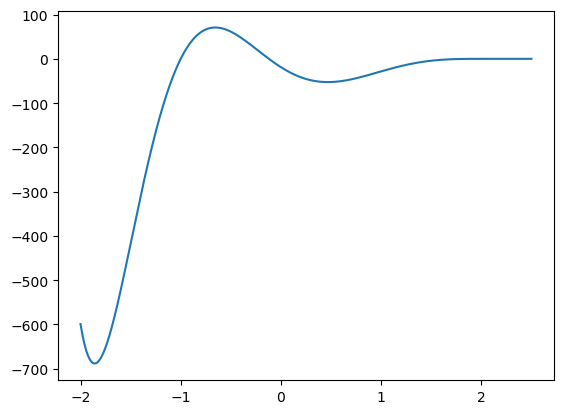

In [300]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(-2,2.5,1000), [p(x) for x in np.linspace(-2,2.5,1000)])

In [277]:
points = np.linspace(-10000, 10000, 1000000)
positive = True 
root = []
for i, x in enumerate(points):
    if i == 0:
        if p(x)<0: positive=False
    else:
        if p(x)>0 and positive==False:
            root.append(x)
            positive=True
        elif p(x)<0 and positive==True:
            root.append(x)
            positive=False
root

[-2.1900021900019055,
 -0.9900009899993165,
 -0.11000010999850929,
 1.970001970003068,
 2.5100025100036873,
 3.4100034100047196]

In [305]:
def cmp(a, b):
    return (a > b) - (a < b) 

In [316]:
from operator import eq
def Bolzano(fonction, a, b, tol=0.000001):
    while abs(b-a)>tol:
        m=(a+b)/2
        if cmp(fonction(m),fonction(a)):
            a=m
        else:
            b=m
    return a, b

In [323]:
Bolzano(p, 4,9)

(8.999999403953552, 9)